In [1]:
!pip install -e '../scikit_alarm_framework/'

Obtaining file:///home/rute/git/scikit_alarm_framework
  Found existing installation: scikit-alarm-framework 0.1
    Uninstalling scikit-alarm-framework-0.1:
      Successfully uninstalled scikit-alarm-framework-0.1
  Running setup.py develop for scikit-alarm-framework


In [2]:
import numpy as np
import pandas as pd
import TransEntropy_mod as te
# import k2_alg as k2

from scikit_alarm_framework.alarm_generator import set_point 

In [ ]:
#recycle flow - xmeas05
#reactor feed rate - xmeas06
#reactor pressure - xmeas07
#reactor_level - xmeasmeas08
#reactor temperature - xmeas09
#product seprator level - xmeas12
#compressor work - xmeas20
#reactor cooling water outlet temperature - xmeas21

In [3]:
dist8_proc = pd.read_csv("resultados_defesa/dist8_proc.csv")
dist8_proc_sv = dist8_proc[['XMEAS' + var for var in ['05','06','07','08', '09', '12', '20', '21']]]

In [4]:
thresh_high = [33,48.3,2804,66,122.93,52.2,274,102.55]
thresh_low = [31,46,2789,62.5,122.7,45,268,102.25]


In [5]:
high_alarms = set_point.generate(dist8_proc_sv, thresh_high)
low_alarms = set_point.generate(dist8_proc_sv, thresh_low)

In [6]:
new_high_names = ['x' + str(var) + '_high' for var in np.arange(1,9)]
new_low_names =   ['x' + str(var) + '_low' for var in np.arange(1,9)]


rename_high = {key:value for key, value in zip(high_alarms.columns,new_high_names)}
rename_low = {key:value for key, value in zip(low_alarms.columns,new_low_names)}

high_alarms = high_alarms.rename(rename_high, axis='columns')
low_alarms = low_alarms.rename(rename_low, axis='columns')


In [7]:
alarms_df = pd.concat([high_alarms, low_alarms], axis=1)

In [8]:
alarms_m5 = te.apply_roll_mean(alarms_df, 5)
alarms_m5.to_csv('resultados_defesa/df_i3e_m5.csv')

In [ ]:
#te_i3e_df = te.transferEntropy_case(alarms_df, 50,1,1) #without moving mean

In [9]:
len(alarms_m5)

69997

In [9]:
 te_i3e_m5 = te.transferEntropy_case(alarms_m5, 50,1,1)

In [10]:
t = np.mean(te_i3e_m5[0]) + 3*np.std(te_i3e_m5[0])
df_te_i3e = pd.DataFrame(data= te_i3e_m5[0], columns= alarms_m5.columns, index = alarms_m5.columns)
df_te_i3e_lag = pd.DataFrame(data= te_i3e_m5[1], columns= alarms_m5.columns, index = alarms_m5.columns)
df_te_i3e.to_csv('resultados_defesa/te_i3e_m5.csv')
df_te_i3e_lag.to_csv('resultados_defesa/te_i3e_m5_lags.csv')

In [45]:

df_te_i3e = pd.read_csv('resultados_defesa/te_i3e_m5.csv', index_col = 0)
t = np.mean(df_te_i3e.values) + 3*np.std(df_te_i3e.values)

te_i3e_ltd = te.generate_df_valid_corrs(df_te_i3e, t)
te_i3e_ac = te.generate_aciclic_graph(te_i3e_ltd.values)

df_te_i3e_ltd = pd.DataFrame(data= te_i3e_ltd, columns= df_te_i3e.columns, index = df_te_i3e.columns)
df_te_i3e_ac = pd.DataFrame(data= te_i3e_ac, columns= df_te_i3e.columns, index = df_te_i3e.columns)
df_te_i3e_ac.to_csv('resultados_defesa/te_i3e_ac.csv')

/home/rute/git/pesquisa/TransEntropy_mod.py:415: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(np.unique(lista[node]) == ['x']):


In [49]:
df_te_i3e_lags = pd.read_csv('resultados_defesa/te_i3e_m5_lags.csv', index_col=0)
df_lags_final  = df_te_i3e_lags[df_te_i3e_ac > 0].fillna(0)
df_lags_final.to_csv('resultados_defesa/df_lags_i3e_ltd.csv')

In [67]:
#test k2
df_m5 = pd.read_csv("resultados_defesa/df_i3e_m5.csv", index_col=0)

dict_lags = te.get_all_shifts(df_lags.columns, df_lags.copy())
k2_te_tree = te.gen_tree_from_lags(dict_lags)

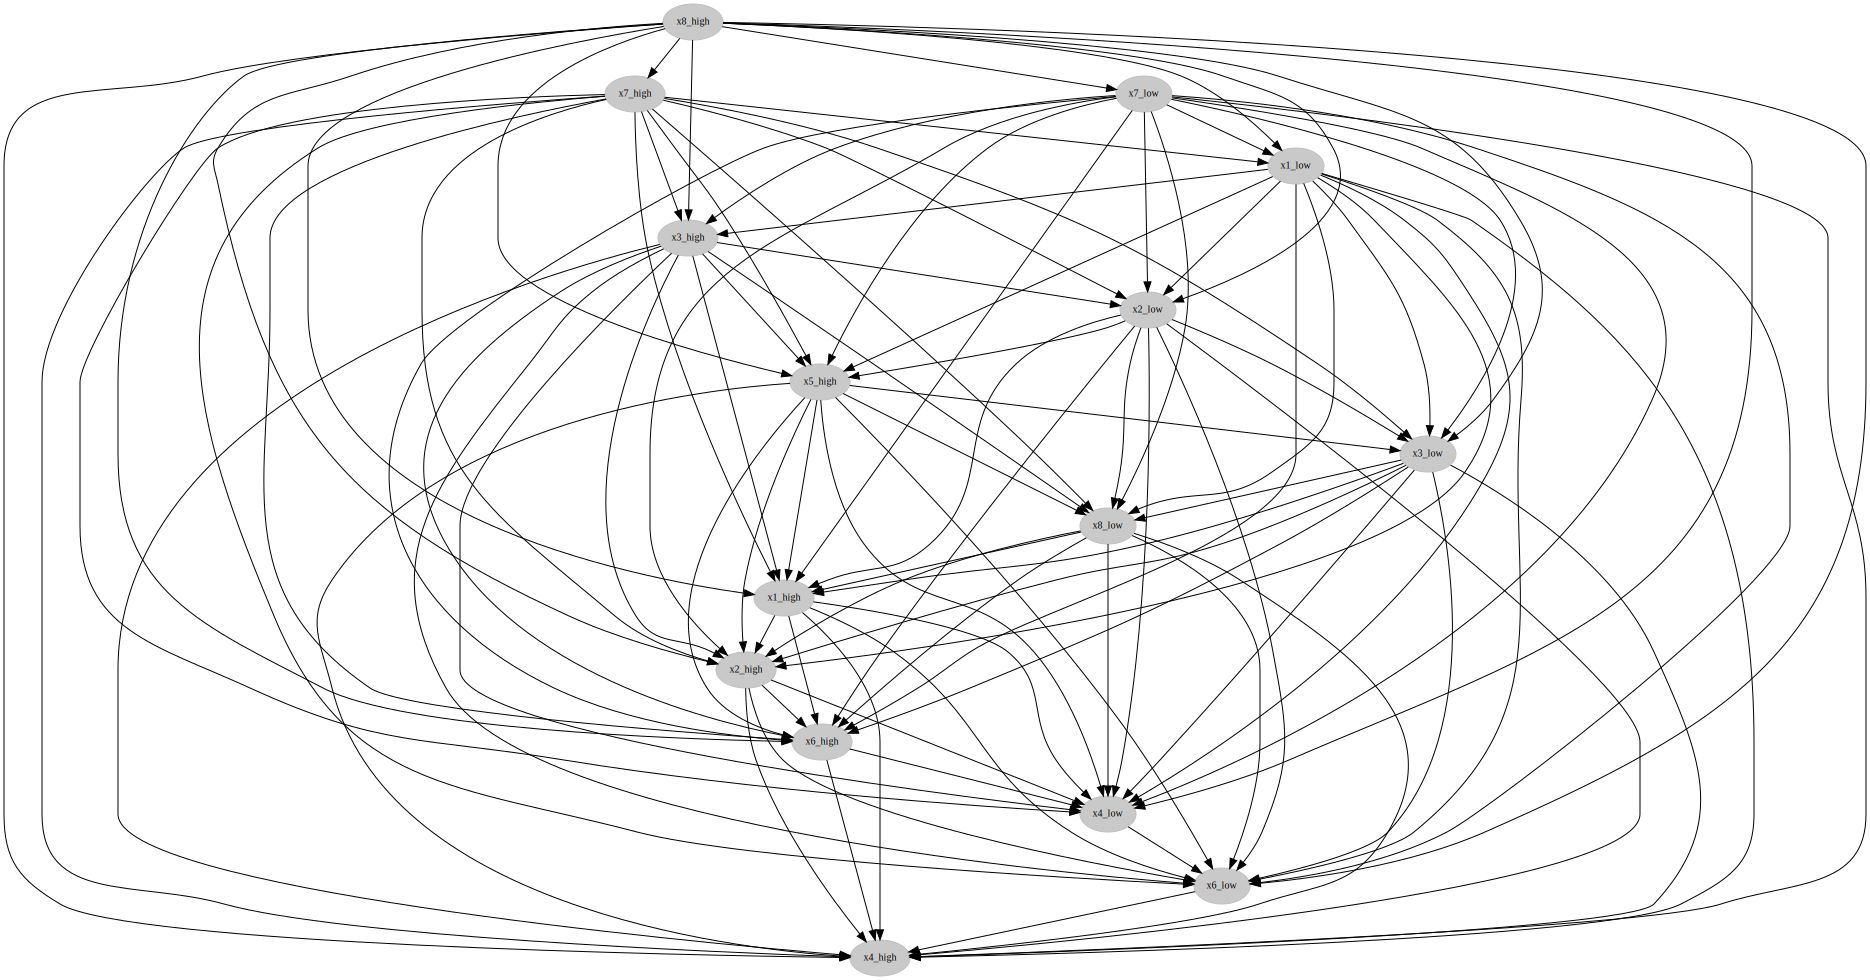

In [68]:
te.graph_simple(df_lags)

In [70]:
k2_result = k2.k2(df_m5, k2_te_tree, df_lags, 0.7)

KeyboardInterrupt: 

here  x7_high x1_high
here  x7_high x2_high
here  x7_high x2_high
here  x8_high x6_high
here  x8_high x6_high
here  x8_high x1_low
here  x8_high x3_low
here  x8_high x3_low
here  x8_high x3_low
here  x8_high x7_low


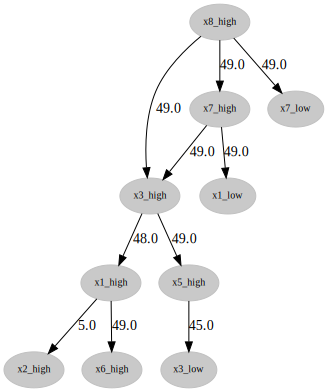

In [66]:
clean_df = k2.gen_clean_df(df_lags, k2_result)
df_path  = df_lags[clean_df>0].fillna(0)

k2.graph_simple(df_path)